In [ ]:
"""plot a single prophet model in several parts - showing the decomposition of the various parts
needs an output of the particular form from prophet_test.ipynb
also build in plots of the residuals after each step (for my pocket slides)
"""

In [55]:
import fbprophet as fp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import RandomizedSearchCV
sns.set_style("darkgrid")
import time
import math
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import random

In [56]:
input_file = './LOS+ANGELES_LEMONS_verbose_output.csv'

In [57]:
input_data = pd.read_csv(input_file)
input_data.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat,y
0,2007-06-01,32.717831,32.717831,32.717831,29.664932,37.774361,1.174245,1.174245,1.174245,0.0,0.0,0.0,1.174245,1.174245,1.174245,33.892076,35.563320
1,2007-06-04,32.855526,32.855526,32.855526,30.436813,38.501317,1.521636,1.521636,1.521636,0.0,0.0,0.0,1.521636,1.521636,1.521636,34.377162,35.843685
2,2007-06-05,32.901424,32.901424,32.901424,30.351837,38.562151,1.640125,1.640125,1.640125,0.0,0.0,0.0,1.640125,1.640125,1.640125,34.541549,35.843685
3,2007-06-06,32.947322,32.947322,32.947322,30.767392,38.792259,1.759275,1.759275,1.759275,0.0,0.0,0.0,1.759275,1.759275,1.759275,34.706597,35.843685
4,2007-06-07,32.993221,32.993221,32.993221,31.035064,38.995288,1.878645,1.878645,1.878645,0.0,0.0,0.0,1.878645,1.878645,1.878645,34.871865,35.843685


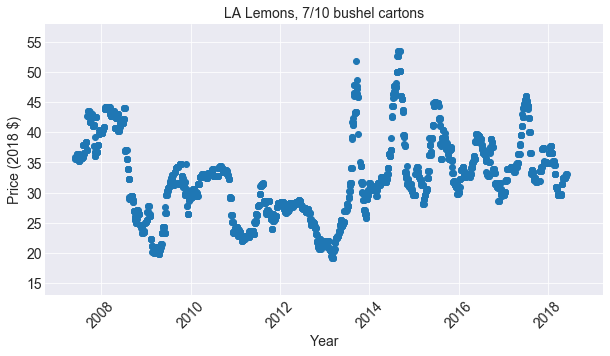

In [70]:
# first plot the actual data


# plot average price as function of time, label with relevant data, save plot
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)

price = 'Price (2018 $)'

graphtitle = 'LA Lemons, 7/10 bushel cartons'

datelist = pd.to_datetime(input_data['ds'])
plot = plt.plot_date(datelist, input_data['y'])

plt.xlabel('Year', fontsize=14)
plt.ylabel(price, fontsize=14)
plt.title(graphtitle, fontsize=14)
plt.xlim(['10/01/2006', '3/28/2019'])
plt.ylim([13, 58])



plt.savefig('test.pdf', format='pdf', bbox_inches='tight')

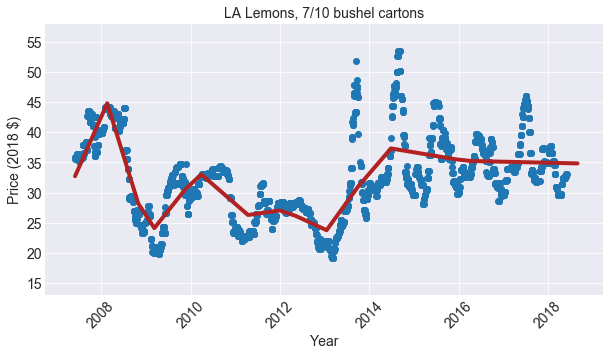

In [71]:
# now overlay the long-term trend


# plot average price as function of time, label with relevant data, save plot
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)

graphtitle = 'LA Lemons, 7/10 bushel cartons'

datelist = pd.to_datetime(input_data['ds'])
plot = plt.plot_date(datelist, input_data['y'])
plot = plt.plot_date(datelist, input_data['trend'], '-', linewidth=4.0, color='FireBrick')

plt.xlabel('Year', fontsize=14)
plt.ylabel(price, fontsize=14)
plt.title(graphtitle, fontsize=14)
plt.xlim(['10/01/2006', '3/28/2019'])
plt.ylim([13, 58])

plt.savefig('test_trend.pdf', format='pdf', bbox_inches='tight')

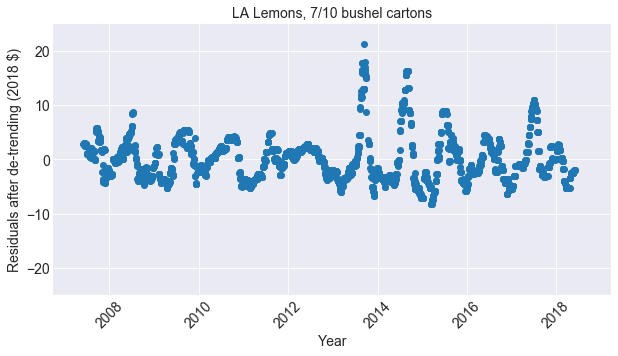

In [76]:
# residuals from long term trend
# plot average price as function of time, label with relevant data, save plot
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)

graphtitle = 'LA Lemons, 7/10 bushel cartons'

datelist = pd.to_datetime(input_data['ds'])
plot = plt.plot_date(datelist, input_data['y']-input_data['trend'])

plt.xlabel('Year', fontsize=14)
plt.ylabel('Residuals after de-trending (2018 $)', fontsize=14)
plt.title(graphtitle, fontsize=14)
plt.xlim(['10/01/2006', '3/28/2019'])
plt.ylim([-25, 25])

plt.savefig('residuals_detrend.pdf', format='pdf', bbox_inches='tight')

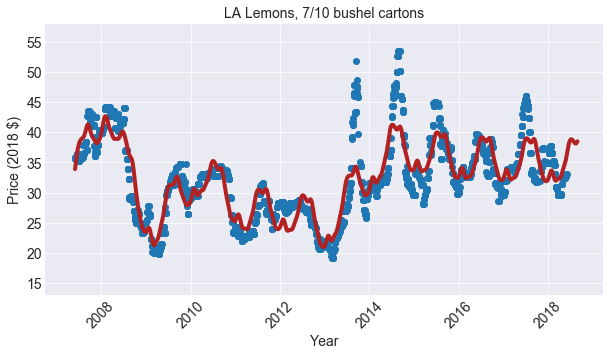

In [72]:
# now overlay the short term fluctuations


# plot average price as function of time, label with relevant data, save plot
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)

price = 'Price (2018 $)'

graphtitle = 'LA Lemons, 7/10 bushel cartons'

datelist = pd.to_datetime(input_data['ds'])
plot = plt.plot_date(datelist, input_data['y'])
plot = plt.plot_date(datelist, input_data['yhat'], '-', linewidth=4.0, color='FireBrick')

plt.xlabel('Year', fontsize=14)
plt.ylabel(price, fontsize=14)
plt.title(graphtitle, fontsize=14)
plt.xlim(['10/01/2006', '3/28/2019'])
plt.ylim([13, 58])

plt.savefig('test_total.pdf', format='pdf', bbox_inches='tight')

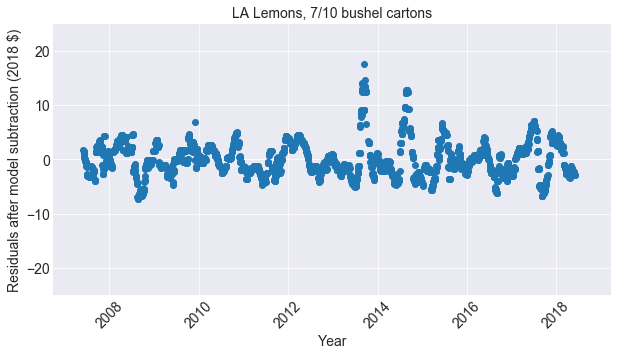

In [77]:
# residuals from entire model
# plot average price as function of time, label with relevant data, save plot
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)

graphtitle = 'LA Lemons, 7/10 bushel cartons'

datelist = pd.to_datetime(input_data['ds'])
plot = plt.plot_date(datelist, input_data['y']-input_data['yhat'])

plt.xlabel('Year', fontsize=14)
plt.ylabel('Residuals after model subtraction (2018 $)', fontsize=14)
plt.title(graphtitle, fontsize=14)
plt.xlim(['10/01/2006', '3/28/2019'])
plt.ylim([-25, 25])

plt.savefig('residuals_demodel.pdf', format='pdf', bbox_inches='tight')

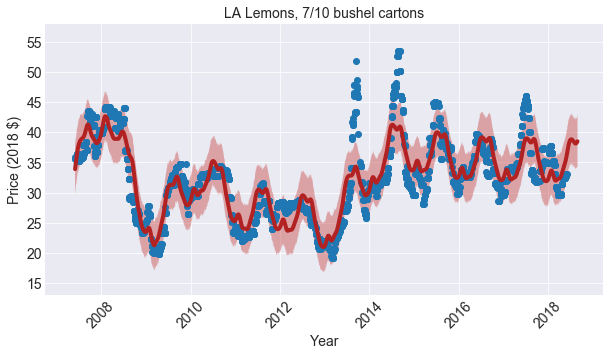

In [73]:
# now add the errors


# plot average price as function of time, label with relevant data, save plot
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)

price = 'Price (2018 $)'

graphtitle = 'LA Lemons, 7/10 bushel cartons'


datelist = pd.to_datetime(input_data['ds'])
plot = plt.plot_date(datelist, input_data['y'])
plot = plt.plot_date(datelist, input_data['yhat'],'-', linewidth=4.0, color='FireBrick')

plot = plt.fill_between(datelist.values, input_data['yhat_lower'], input_data['yhat_upper'], facecolor='IndianRed', alpha=0.5)


plt.xlabel('Year', fontsize=14)
plt.ylabel(price, fontsize=14)
plt.title(graphtitle, fontsize=14)
plt.xlim(['10/01/2006', '3/28/2019'])
plt.ylim([13, 58])

plt.savefig('test_total_unch.pdf', format='pdf', bbox_inches='tight')
